# Aula 11 - Agrupamento
Para utilizar os algoritmos de agrupamento usamos o módulo de clustering do pacote scikit learn.
(https://scikit-learn.org/stable/modules/clustering.html). Neste exemplo faremos o agrupamento usando o algoritmo *k-means*.

## 11.1 Gerando dados

Inicialmente vamos trabalhar com dados criados artificialmente, para que possamos enxergar o que está acontecendo. Geramos 3 conjuntos de pontos no plano euclidiano, sendo que cada conjunto possui caracteristicas parecidas. Abaixo os pontos são gerados, e cada conjunto é plotado com um *scatterplot* com cores distintas.

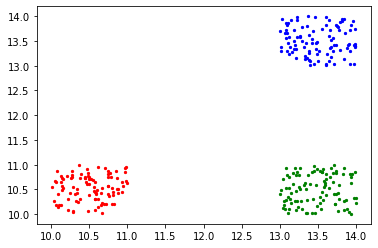

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados aleatórios para testar o algoritmo
l_x1 = np.random.rand(100) + 10
l_y1 = np.random.rand(100) + 10

l_x2 = np.random.rand(100) + 13
l_y2 = np.random.rand(100) + 13

l_x3 = np.random.rand(100) + 13
l_y3 = np.random.rand(100) + 10

fig, ax = plt.subplots(1,1)
ax.scatter(l_x1, l_y1, 5 ,color  = "red")
ax.scatter(l_x2, l_y2, 5 ,color  = "blue")
ax.scatter(l_x3, l_y3, 5 ,color  = "green")
plt.savefig("cluster.pdf")
plt.show()

Vemos que de fato os dados são bem 'separáveis' em 3 conjuntos distintos. Abaixo vamos salvar o conjunto criado em um único array (em um caso real, não saberíamos à qual grupo cada ponto pertence, nem mesmo o número de grupos totais).

In [4]:
# Salvando os dados em uma única lista de np array com duas dimensões, e transformando tudo em um array
X = []
for i in range(0, len(l_x1)):
    X.append( np.array((l_x1[i],l_y1[i]))  )
    X.append( np.array((l_x2[i],l_y2[i]))  )
    X.append( np.array((l_x3[i],l_y3[i]))  )

X = np.array(X)

## 11.2 Calculando os grupos
Usamos o `KMeans` para calcular os grupos aos quais os dados pertencem. Para isso precisamos passar o número de grupos que queremos utilizar (no caso abaixo 3). O retorno é um array com o mesmo tamanho do conjunto de dados de entrada, em que cada elemento contém um número referente ao cluster que o dado pertence.

In [5]:
# Usando o algoritmo para ajustar os dados usando 3 clusters
from sklearn.cluster import KMeans as km
kmeans = km(n_clusters = 3, random_state = 0).fit(X)

# O retorno é um array com o numero do cluster a que a amostra foi associada
kmeans.labels_

array([1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2])

Agora podemos separar os dados, cada um em seu cluster. Usando a indexação boolena no vetor X para
coletar todos os valores em que labels == 1, 2, .... Em seguida plotamos os dados em um gráfico (scatterplot) novamente, e conseguimos retornar ao mesmo gráfico que fizemos após a geração dos dados. O que mostra que todos os dados ficaram de fato em seus respectivos grupos.

Ainda, usamos o método `cluster_centers`, que contém um array bidimensional (neste caso) com os centróides dos grupos para plotá-los também.

array([[13.52598415, 13.45670901],
       [10.53473357, 10.45399725],
       [13.51595468, 10.49950257]])

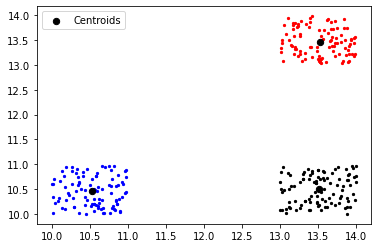

In [6]:

cond = kmeans.labels_ == 0 
C1 = X[cond]

cond2 = kmeans.labels_ == 1 
C2 = X[cond2]

cond3 = kmeans.labels_ == 2 
C3 = X[cond3]

'Plotando os dados no plano, cada um com uma cor'
fig, ax = plt.subplots(1,1)
plt.scatter(C1[:,0], C1[:,1],5, color = "red") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1
plt.scatter(C2[:,0], C2[:,1],5, color = "blue") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1
plt.scatter(C3[:,0], C3[:,1],5, color = "black") # Todas as linhas da coluna 0,  # Todas as linhas da coluna 1

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],40, c = 'black', label = 'Centroids')
plt.legend() 
kmeans.cluster_centers_

## 11.3 Definindo o número de grupos (*clusters*)
Mas como determinar o número de clusters? No exemplo acima definimos 3, pois já sabíamos de antemão que esse era um bom número, dado que o conjunto foi gerado com 3 grupos. Em problemas reais, no entanto, não teremos nenhuma informações a respeito desse número.

Podemos usar uma abordagem visual chamada **gráfico de cotovelo (elbow plot)**. Para isso, usamos uma medida de desempenho do agrupamento chamada WCSS(Within-Cluster Sum of Square), ou soma dos quadrados intra-grupos. Esse medida calcula a soma da distancia de todos os pontos ao centróide de seus grupos. A idéia é que a medida que o número de grupos aumenta, essa distância deve ser reduzida. Porém a partir de um determinado número a redução passa a ser insignificante, de forma que esse é o ponto em que aumentar o número de grupos não influencia mais no desempenho do agrupamento. 


O atributo `.inertia_` fornece o WCCS. Com isso podemos calcular os grupos para diversos valores de *k*, salvando os valores de WCCS em uma lista, em seguida plotamos os valores e obtemos o gráfico de cotovelo.

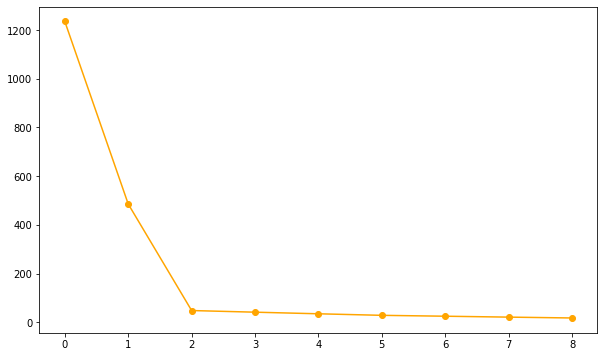

In [7]:
l_inertia = []
for k in range(1,10):
    kmeans = km(n_clusters = k, random_state = 0).fit(X)
    l_inertia.append(kmeans.inertia_)
l_inertia

# Agora plotamos os valores de inertia e vemos como o gráfico de cotovelo fica:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
ax.plot(l_inertia, marker = "o", color = "orange")
plt.show()

Pela análise do gráfico percebemos que o cotovelo está localizado no segundo grupo (como começa em zero, no terceiro), o que condiz com o esperado.

## 11.4 Prevendo novos valores
Com o modelo estimado, podemos prever em quais grupos novos conjuntos de dados seriam atribuidos, usando a função `predict`. O exemplo abaixo demonstra:

In [151]:
# Estimando à qual cluster o ponto [10.3, 13.1] seria atribuido
novo_dado = [[10.3, 13.1]]
grupo_novo_dado = kmeans.predict(novo_dado)
print("O grupo do novo dado é : ",grupo_novo_dado[0])

O grupo do novo dado é :  1


## 11.5 Cuidados

### 11.5.1 Tratando dados não numéricos (categóricos/ordinais)
O método k-means só funciona com dados numéricos, de forma que se existem atributos categóricos se faz necessário realizar uma transformações nos dados. Considere o DataFrame abaixo, com a coluna C2 e C3 do tipo categórico.

In [15]:
C1 = [.4,.5,.8,.9] #Float
C2 = ["Tipo1","Tipo2","Tipo3","Tipo4"]
C3 = ["SP","SP","SC","MG"]
C4 = [10,20,20,30]
dic = {"C1": C1,
       "C2": C2,
       "C3": C3,
       "C4": C4,}
df = pd.DataFrame(dic)
df

,C1,C2,C3,C4
0,0.4,Tipo1,SP,10
1,0.5,Tipo2,SP,20
2,0.8,Tipo3,SC,20
3,0.9,Tipo4,MG,30


Usando o método dos dataframes `get_dummies()` é possível fazer a transformação automática de valores categóricos para um array binário. Podemos passar como argumento uma determinada coluna:

In [25]:
pd.get_dummies(df["C2"])

,Tipo1,Tipo2,Tipo3,Tipo4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


Podemos também passar o dataframe inteiro, de forma que as conversões serão feitas automáticamente:

In [26]:
pd.get_dummies(df)

,C1,C4,C2_Tipo1,C2_Tipo2,C2_Tipo3,C2_Tipo4,C3_MG,C3_SC,C3_SP
0,0.4,10,1,0,0,0,0,0,1
1,0.5,20,0,1,0,0,0,0,1
2,0.8,20,0,0,1,0,0,1,0
3,0.9,30,0,0,0,1,1,0,0


### 11.5.2 A influência da escala
Sempre ao realizarmos uma análise ade agrupamento precisamos estar atentos às escalas dos atributos. Se elas são de magnitudes muito diferentes, então um atibuto pode dominar os outros, dado que a distância entre os pontos é realizada pela norma L2. Considere o exemplo abaixo:

In [34]:
import math as mt

idade1,renda1 = 15,10000
idade2,renda2 = 20,15000

dist = mt.sqrt((idade1 - idade2)**2 + (renda1 - renda2)**2 )
print(dist)

5000.03609986968


Alterando muito uma das variáveis (idade), não afeta quase nada nas distâncias, de forma que é como se a variável idade não fosse usada no agrupamento, ou ainda, estamos dando muito mais importância à variável renda. Isso acontece pela **diferença de escalas**.

In [35]:
import math as mt

idade1,renda1 = 100,10000
idade2,renda2 = 1,15000

dist = mt.sqrt((idade1 - idade2)**2 + (renda1 - renda2)**2 )
print(dist)

5000.980003959224


Podemos resolver esse problema padronizando os dados das colunas. Existem diversas formas de padronização, uma delas consiste em simplesmente dividir os dados de uma coluna pelo maior valor da mesma coluna. Dessa forma todos ficam padronizados em uma escala que varia de 0 a 1. Considere como a padronização altera a distância calculada no exemplo anterior.

In [38]:
import math as mt

idade1,renda1 = 15,10000
idade2,renda2 = 20,15000

maior_idade = 20
maior_renda = 10000

# Normalizando os dados
idade1_norm,renda1_norm = idade1/maior_idade, renda1/maior_renda
idade2_norm,renda2_norm = idade2/maior_idade, renda2/maior_renda

print("Dados 1 normalizados : ", idade1_norm, renda1_norm)
print("Dados 2 normalizados : ", idade2_norm, renda2_norm)

dist = mt.sqrt((idade1_norm - idade2_norm)**2 + (renda1_norm - renda2_norm)**2 )
print("Distancia normalizada : ",dist)

Dados 1 normalizados :  0.75 1.0
Dados 2 normalizados :  1.0 1.5
Distancia normalizada :  0.5590169943749475


Alterando a idade, notamos que a distância também é alterada proporcionalmente.

In [44]:
import math as mt

idade1,renda1 = 15,10000
idade2,renda2 = 1,15000

maior_idade = 20
maior_renda = 10000

# Normalizando os dados
idade1_pad,renda1_pad = idade1/maior_idade, renda1/maior_renda
idade2_pad,renda2_pad = idade2/maior_idade, renda2/maior_renda

print("Dados 1 normalizados : ", idade1_pad, renda1_pad)
print("Dados 2 normalizados : ", idade2_pad, renda2_pad)

dist = mt.sqrt((idade1_pad - idade2_pad)**2 + (renda1_pad - renda2_pad)**2 )
print("Distância normalizada : ",dist)

Dados 1 normalizados :  0.75 1.0
Dados 2 normalizados :  0.05 1.5
Distância normalizada :  0.8602325267042626


Podemos padronizar os dados do dataframe dividindo todos os valores de uma coluna pelo maior valor da mesma coluna. Usando o dataframe criado acima, com as variáveis extras, temos:

In [47]:
df_var_extras = pd.get_dummies(df)

# Iterando em cada coluna e substituindo seus valores por eles mesmo divididos pelo máximo da coluna
for col in df_var_extras.columns:
    df_var_extras[col] = df_var_extras[col]/df_var_extras[col].max()

df_var_extras

,C1,C4,C2_Tipo1,C2_Tipo2,C2_Tipo3,C2_Tipo4,C3_MG,C3_SC,C3_SP
0,0.444444,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.555556,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.888889,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 11.5.3 Redução da dimensionalidade (PCA *principal component analysis*)
A técnica de PCA têm por objetivo reduzir a dimensionalidade dos dados, de forma que a maior variabilidade ainda possa ser explicada. O PCA *altera os atributos* criando combinações lineares dos antigos, que os representem. Ou seja, não existe uma interpretação do que os números significam (antes da análise todos os atributos poderiam ser monetários, após o PCA as novas variáveis criadas não possuem tipo algum).

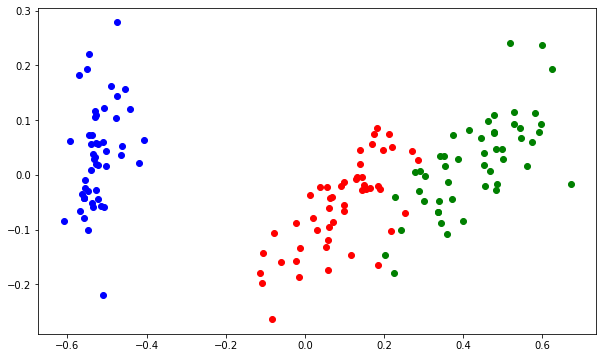

In [108]:
# Usando o conjunto de dados Iris
df_iris = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\Python\Datasets\iris.csv", sep = ";")

# Padronizando os dados
df_iris.iloc[:,0:df_iris.shape[1] - 1] = df_iris.iloc[:,0:df_iris.shape[1] - 1] / df_iris.iloc[:,0:df_iris.shape[1] - 1].max()
df_iris

# Separando os dados em X (feature) e Y(alvos)
X = df_iris.iloc[:,:df_iris.shape[1] - 1]
Y = df_iris.iloc[:,df_iris.shape[1] - 1:]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
componentes_principais = pca.fit_transform(X)
#print(componentes_principais)
x1 = componentes_principais[:,0:1]
x2 = componentes_principais[:,1:2]

#Plotando os dados em um scatter_plot, com as cores de acordo com os labels:
cond_setosa     = df_iris["target"] == 'Iris-setosa'
cond_versicolor = df_iris["target"] == 'Iris-versicolor'
cond_virginica  = df_iris["target"] == 'Iris-virginica'

fig, ax = plt.subplots(1,1)
ax.scatter(x1[cond_setosa],x2[cond_setosa],color = "blue")
ax.scatter(x1[cond_versicolor],x2[cond_versicolor],color = "red")
ax.scatter(x1[cond_virginica],x2[cond_virginica],color = "green")
fig.set_size_inches(10,6)
plt.show()
#df_princiapal          = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

<div style="background-color:gray">
    <h1 style = "text-align:center; color:white"> Exercícios</h1>
</div>

1. Considere o conjunto de dados `clientes_shopping.csv`. Este conjunto contém os dados de diversos clientes de um Shoppping center, com os dados de renda anual e coeficiente de compra (dentre outros). O coeficiente de compra é um número entre 0 e 100 valorando o quanto o cliente compra no Shopping. O shopping deseja fazer uma segmentação dos clientes para criar uma campanha de marketing mais efetiva. Implemente a segmentação usando o algoritmo k-means, com base nos dois atributos mencionados acima.
    1. Encontre o número ideal de grupos
    2. Plote o gráfico de cotovelo
    3. Plote os dados dos clientes após a segmentação com cores diferentes
2. Considere o conjunto de dados `MateriaisConstrucao.xlsx`, que mantém um registro da quantidade de itens que foram comprados em uma loja de materiais de construção. Será que existem grupos de *padrões de compra* que podem ser identificados? Aplique o agrupamento para descobrir. Use a ferramenta de PCA (*principal component analysis*) para reduzir a dimensionalidade dos dados e plotar os pontos em um gráfico 2D.
3. (**Se tivermos visto Streamlit**) Crie um aplicativo que leia um banco de dados, e permita que o usuário selecione 2 atributos (numéricos). Com esses atributos, faça o que se pede:
    1. Mantenha um slide para o usuário selecionar o número de grupos.
    2. Quando o slide é alterado, o algoritmo k-means é calculado considerando esse número.
    3. Um gráfico com os elementos de cada grupo é mostrado, sendo que cada grupo deve possuir uma cor diferente.
    
4. **(EXTRA)**. O agrupamento pode ser utilizado para melhorar a acurácia de um classificador/regressor. Imagine que o shopping deseja criar um regressor para estimar o coeficiente de compra de novos clientes com base nos atributos *genero*, *idade* e *renda anual*.
    Podemos primeiro encontrar os grupos com caracteristicas parecidas usando um algoritmo de agrupamento. Em seguida, criamos um classificador diferente para cada um desses grupos, de forma que a chance de se obter uma classificação correta aumenta.

# Plotagem em 3D

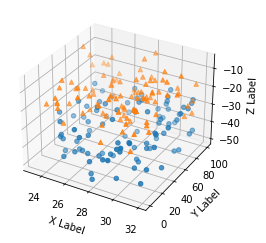

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.savefig("cluster3d.pdf")
plt.show()

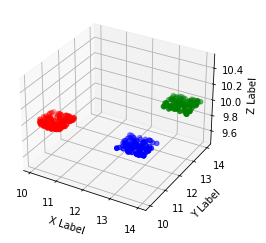

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
l_x1 = np.random.rand(100) + 10
l_y1 = np.random.rand(100) + 10
l_z1 = [10 for i in range(100)]

l_x2 = np.random.rand(100) + 13
l_y2 = np.random.rand(100) + 13
l_z2 = [10 for i in range(100)]

l_x3 = np.random.rand(100) + 13
l_y3 = np.random.rand(100) + 10
l_z3 = [10 for i in range(100)]

ax.scatter(l_x1, l_y1, l_z1, color = "red")
ax.scatter(l_x2, l_y2, l_z2, color = "green")
ax.scatter(l_x3, l_y3, l_z3, color = "blue")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.savefig("cluster3d2.pdf")
plt.show()